In [1]:
import pickle
from heron import sampling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open("/home/daniel/repositories/heron/scripts/NSPolytrope_amp.gp", "rb") as filehandle:
    gp_amp = pickle.load(filehandle)
with open("/home/daniel/repositories/heron/scripts/NSPolytrope_phase.gp", "rb") as filehandle:
    gp_phase = pickle.load(filehandle)

In [3]:
vec = gp_amp.kernel.get_vector()

In [13]:
gp_amp.training_object.denormalise(gp_amp.training_data, "target")

array([[  2.14252000e+03,   3.42500000e+01,   2.00000000e+00,
          3.50000000e+00],
       [  2.20447000e+03,   3.42500000e+01,   2.00000000e+00,
          3.50000000e+00],
       [  2.26642000e+03,   3.42500000e+01,   2.00000000e+00,
          3.50000000e+00],
       ..., 
       [  5.02939000e+03,   3.48500000e+01,   3.50000000e+00,
          3.50000000e+00],
       [  5.09134000e+03,   3.48500000e+01,   3.50000000e+00,
          3.50000000e+00],
       [  5.15329000e+03,   3.48500000e+01,   3.50000000e+00,
          3.50000000e+00]])

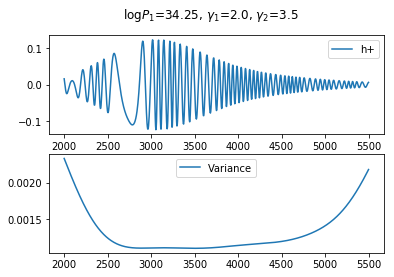

In [18]:
logP1 = 34.25
gamma1 = 2.0
gamma2 = 3.5

times = np.linspace(2000, 5500, 1000)

#gp_amp.kernel.set_vector(MAP.x)
#gp_amp.update()
sample_locs = sampling.draw_samples(gp_amp, t=(2000,5500,1000), logP1=logP1, gamma1=gamma1, gamma2=gamma2)#, logP1=1.0, gamma1=4, gamma2=6, gamma3=10)
pred_amp = gp_amp.prediction(sample_locs.T)
pred_phase = gp_phase.prediction(sample_locs.T)



f, ax = plt.subplots(2, 1)
f.suptitle("$\logP_1$={}, $\gamma_1$={}, $\gamma_2$={}".format(logP1, gamma1, gamma2))
ax[0].plot(times, pred_amp[0]*np.sin(pred_phase[0]), 
           label="h+")
#ax[0].fill_between(times, 
#                 pred[0]+ pred[1]**2, 
#                 pred[0]- pred[1]**2, alpha=0.2)
ax[1].plot(times, pred_amp[1], label="Variance")
ax[0].legend()
ax[1].legend()

In [126]:
from scipy.optimize import minimize

In [127]:
vec = [  8.30561504,  39.25846755, -20.32869133,   4.01367306,   1.15688994]
MAP = minimize(gp_amp.neg_ln_likelihood, np.random.rand(5)*10)

In [128]:
MAP.x, MAP.fun

(array([ -3.99150665,  -3.92281844,  29.82245225, -11.11173499,   4.14681202]),
 33.74810502966129)

In [112]:
np.random.rand(5)

array([ 0.33237067,  0.99140386,  0.70855616,  0.52943897,  0.89204933])

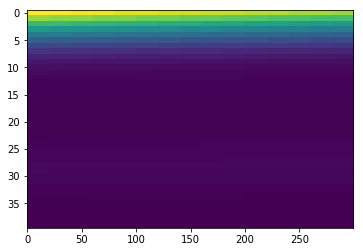

In [136]:
logP1 = (34.0, 35.0, 40)
gamma1 = 2.0
gamma2 = 3.5

times = np.linspace(2000, 4000, 300)

sample_locs = sampling.draw_samples(gp_amp, t=(2000,4000,300), logP1=logP1, gamma1=gamma1, gamma2=gamma2)#, logP1=1.0, gamma1=4, gamma2=6, gamma3=10)
pred_amp = gp_amp.prediction(sample_locs.T)
pred_phase = gp_phase.prediction(sample_locs.T)

plt.imshow(pred_amp[1].reshape(40, 300), aspect=5.0)

In [9]:
sample_locs = sampling.draw_samples(gp, t=(0,100,100), logP1=1.0, gamma1=4, gamma2=6, gamma3=10)

In [10]:
import heron.training

In [97]:
from scipy.optimize import minimize

In [98]:
minimize?